In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
#boston=pd.read_csv('../msit_ml_classwork/MSIT_ML_CLASS/datasets/boston_housing.csv')
boston=np.genfromtxt('../msit_ml_classwork/MSIT_ML_CLASS/datasets/boston_housing.csv',delimiter=',',skip_header=1,usecols=[0,3])

In [8]:
boston

array([[6.5750e+00, 5.0400e+05],
       [6.4210e+00, 4.5360e+05],
       [7.1850e+00, 7.2870e+05],
       [6.9980e+00, 7.0140e+05],
       [7.1470e+00, 7.6020e+05],
       [6.4300e+00, 6.0270e+05],
       [6.0120e+00, 4.8090e+05],
       [6.1720e+00, 5.6910e+05],
       [5.6310e+00, 3.4650e+05],
       [6.0040e+00, 3.9690e+05],
       [6.3770e+00, 3.1500e+05],
       [6.0090e+00, 3.9690e+05],
       [5.8890e+00, 4.5570e+05],
       [5.9490e+00, 4.2840e+05],
       [6.0960e+00, 3.8220e+05],
       [5.8340e+00, 4.1790e+05],
       [5.9350e+00, 4.8510e+05],
       [5.9900e+00, 3.6750e+05],
       [5.4560e+00, 4.2420e+05],
       [5.7270e+00, 3.8220e+05],
       [5.5700e+00, 2.8560e+05],
       [5.9650e+00, 4.1160e+05],
       [6.1420e+00, 3.1920e+05],
       [5.8130e+00, 3.0450e+05],
       [5.9240e+00, 3.2760e+05],
       [5.5990e+00, 2.9190e+05],
       [5.8130e+00, 3.4860e+05],
       [6.0470e+00, 3.1080e+05],
       [6.4950e+00, 3.8640e+05],
       [6.6740e+00, 4.4100e+05],
       [5.

In [9]:
len(boston)

489

In [10]:
rm=boston[:,0]
medv=boston[:,1]

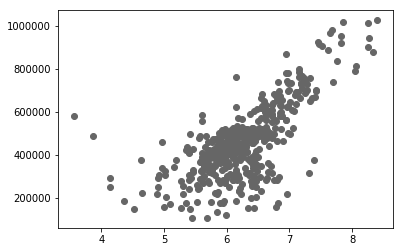

In [11]:
plt.scatter(rm,medv,color='0.4')

In [49]:
alpha=0.022
num_iters=10000
slope=0
i_cept=0

In [50]:
def error_calc(rm,medv,slope,i_cept):
    error=0
    #N=len(data)
    for i in range(0,len(rm)):
        error+=(medv[i]-(slope*rm[i]+i_cept))**2
    error/=len(rm)
    return error

In [51]:
def grad_step(rm,medv,slope,i_cept,l_rate):
    del_slope=0
    del_icept=0
    for i in range(0,len(rm)):
        del_slope+=2*(-medv[i]+(slope*rm[i]+i_cept))*rm[i]/len(rm)
        del_icept+=2*(-medv[i]+(slope*rm[i]+i_cept))/len(rm)
    slope-=del_slope*l_rate
    i_cept-=del_icept*l_rate
    return [slope,i_cept]

In [52]:
err_lst=[]
def grad_desc(rm,medv,slope,i_cept,iters,l_rate):
    for i in range(0,iters):
        slope,i_cept=grad_step(rm,medv,slope,i_cept,l_rate)
        err_lst.append(error_calc(rm,medv,slope,i_cept))
    return [slope,i_cept]

In [53]:
print("initial: y-intercept=",i_cept,"  slope=",slope,"  error=",error_calc(rm,medv,slope,i_cept))

initial: y-intercept= 0   slope= 0   error= 233709014171.77914


In [54]:
slope,i_cept=grad_desc(rm,medv,slope,i_cept,num_iters,alpha)
print("final: y-intercept=",i_cept,"  slope=",slope,"  error=",error_calc(rm,medv,slope,i_cept))

final: y-intercept= -655863.149479   slope= 177921.60858357235   error= 14020523710.36733


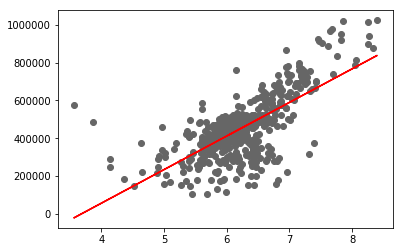

<function matplotlib.pyplot.show(*args, **kw)>

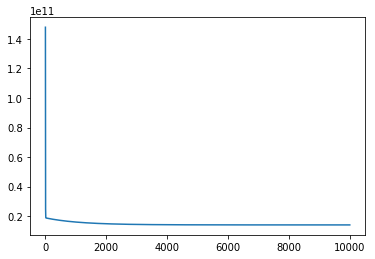

In [55]:
plt.scatter(rm,medv,color='0.4')
line_cood=[slope*x+i_cept for x in rm]
plt.plot(rm,line_cood,color='RED')
plt.show()

plt.plot(list(range(num_iters)),err_lst)
plt.show